In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import scipy as status

In [5]:
data = pd.read_csv("C:/Users/SUBIN.S/Downloads/classification_data.csv")
data.head()

count_session  count_hit channelGrouping  totals_newVisits  \
0              9       1194         (Other)                 0   
1              9       1194         (Other)                 0   
2             28       1816     Paid Search                 0   
3              2        299     Paid Search                 0   
4              2        299     Paid Search                 0   

    device_browser device_operatingSystem  device_isMobile  \
0  GoogleAnalytics                Android             True   
1  GoogleAnalytics                Android             True   
2  GoogleAnalytics                Android             True   
3  GoogleAnalytics                Android             True   
4  GoogleAnalytics                Android             True   

  device_deviceCategory geoNetwork_region  geoNetwork_latitude  ...  \
0                mobile           Sharjah              25.3463  ...   
1                mobile           Sharjah              25.3463  ...   
2                mobile             Ajman              25.4052  ...   
3                mobile         Abu Dhabi              24.4539  ...   
4                mobile         Abu Dhabi              24.4539  ...   

                latest_keyword  earliest_isTrueDirect  latest_isTrueDirect  \
0                    (not set)                   True                 True   
1                    (not set)                   True                 True   
2         (automatic matching)                   True                 True   
3  custom0==marketplace&+id==*                   True                 True   
4  custom0==marketplace&+id==*                   True                 True   

   num_interactions  bounces  time_on_site  transactionRevenue  \
0              1900        0          5617                   0   
1              1900        0          5617                   0   
2              3843        0         77417          1477195214   
3               592        0          1576                   0   
4               592        0          1576                   0   

                                      products_array  has_converted  \
0                               food////food////food              0   
1                               food////food////food              0   
2  (not set)////baby_products--milk,_food_&_juice...              1   
3                                       food////food              0   
4                                       food////food              0   

   target_date  
0   2021-01-01  
1   2021-01-01  
2   2021-01-01  
3   2021-01-01  
4   2021-01-01  

[5 rows x 46 columns]

# EDA

In [6]:
null_data = data.isnull().sum()

In [7]:
null_df = pd.DataFrame({
    "columns": null_data.index,
    "null_precentage": null_data.values
}).sort_values("null_precentage",ascending=False)
null_df

columns  null_precentage
0            count_session                0
34           latest_medium                0
25       time_latest_visit                0
26          avg_visit_time                0
27   days_since_last_visit                0
28  days_since_first_visit                0
29          visits_per_day                0
30             bounce_rate                0
31         earliest_source                0
32           latest_source                0
33         earliest_medium                0
35        earliest_keyword                0
1                count_hit                0
36          latest_keyword                0
37   earliest_isTrueDirect                0
38     latest_isTrueDirect                0
39        num_interactions                0
40                 bounces                0
41            time_on_site                0
42      transactionRevenue                0
43          products_array                0
44           has_converted                0
24     time_earliest_visit                0
23     latest_visit_number                0
22   earliest_visit_number                0
21       earliest_visit_id                0
2          channelGrouping                0
3         totals_newVisits                0
4           device_browser                0
5   device_operatingSystem                0
6          device_isMobile                0
7    device_deviceCategory                0
8        geoNetwork_region                0
9      geoNetwork_latitude                0
10    geoNetwork_longitude                0
11        historic_session                0
12   historic_session_page                0
13                 youtube                0
14        avg_session_time                0
15   avg_session_time_page                0
16        single_page_rate                0
17       sessionQualityDim                0
18            last_visitId                0
19         latest_visit_id                0
20       visitId_threshold                0
45             target_date                0

In [8]:
data.shape

(100000, 46)

In [9]:
dup_counts = data.duplicated().sum()
dup_counts

90793

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(9207, 46)

In [12]:
data.dtypes

count_session               int64
count_hit                   int64
channelGrouping            object
totals_newVisits            int64
device_browser             object
device_operatingSystem     object
device_isMobile              bool
device_deviceCategory      object
geoNetwork_region          object
geoNetwork_latitude       float64
geoNetwork_longitude      float64
historic_session            int64
historic_session_page       int64
youtube                     int64
avg_session_time          float64
avg_session_time_page     float64
single_page_rate          float64
sessionQualityDim           int64
last_visitId                int64
latest_visit_id             int64
visitId_threshold           int64
earliest_visit_id           int64
earliest_visit_number       int64
latest_visit_number         int64
time_earliest_visit       float64
time_latest_visit         float64
avg_visit_time              int64
days_since_last_visit       int64
days_since_first_visit      int64
visits_per_day

In [13]:
data.describe().T

count          mean           std           min  \
count_session           9207.0  1.990800e+01  2.105902e+01  1.000000e+00   
count_hit               9207.0  2.489794e+03  3.399778e+03  2.000000e+00   
totals_newVisits        9207.0  1.238188e-02  1.105889e-01  0.000000e+00   
geoNetwork_latitude     9207.0  2.488703e+01  3.414327e+00 -3.392490e+01   
geoNetwork_longitude    9207.0  5.427132e+01  8.852935e+00 -8.762980e+01   
historic_session        9207.0  8.449205e+03  1.094549e+04  2.000000e+00   
historic_session_page   9207.0  1.807768e+03  4.143497e+03  0.000000e+00   
youtube                 9207.0  0.000000e+00  0.000000e+00  0.000000e+00   
avg_session_time        9207.0  4.692371e+02  4.342812e+02  2.000000e+00   
avg_session_time_page   9207.0  1.642882e+02  4.208421e+02  0.000000e+00   
single_page_rate        9207.0  8.748416e-01  2.508754e-01  0.000000e+00   
sessionQualityDim       9207.0  1.148822e+01  1.571548e+01  1.000000e+00   
last_visitId            9207.0  1.619260e+09  1.298125e+06  1.609492e+09   
latest_visit_id         9207.0  1.619260e+09  1.298125e+06  1.609492e+09   
visitId_threshold       9207.0  1.616668e+09  1.298125e+06  1.606900e+09   
earliest_visit_id       9207.0  1.617291e+09  1.267289e+06  1.606934e+09   
earliest_visit_number   9207.0  6.675497e+01  1.143909e+02  1.000000e+00   
latest_visit_number     9207.0  2.314916e+02  2.962167e+03  1.000000e+00   
time_earliest_visit     9207.0  1.242421e+01  5.228611e+00  0.000000e+00   
time_latest_visit       9207.0  1.308840e+01  5.156785e+00  0.000000e+00   
avg_visit_time          9207.0  1.245943e+01  3.116302e+00  0.000000e+00   
days_since_last_visit   9207.0  0.000000e+00  0.000000e+00  0.000000e+00   
days_since_first_visit  9207.0  2.275975e+01  8.951171e+00  0.000000e+00   
visits_per_day          9207.0  1.143908e+02  1.365072e+02  9.230769e-01   
bounce_rate             9207.0  1.338004e-02  1.151751e-01  0.000000e+00   
num_interactions        9207.0  8.871947e+03  1.244537e+04  2.000000e+01   
bounces                 9207.0  6.625394e-03  2.167733e-01  0.000000e+00   
time_on_site            9207.0  1.579085e+04  4.955897e+04  0.000000e+00   
transactionRevenue      9207.0  1.900626e+08  6.639662e+08  0.000000e+00   
has_converted           9207.0  4.163137e-01  4.929736e-01  0.000000e+00   

                                 25%           50%           75%           max  
count_session           7.000000e+00  1.400000e+01  2.600000e+01  2.700000e+02  
count_hit               5.250000e+02  1.347000e+03  3.149000e+03  4.874400e+04  
totals_newVisits        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
geoNetwork_latitude     2.445390e+01  2.520480e+01  2.520480e+01  5.932930e+01  
geoNetwork_longitude    5.437730e+01  5.527080e+01  5.527080e+01  1.403187e+02  
historic_session        2.049000e+03  4.923000e+03  1.053800e+04  1.817150e+05  
historic_session_page   0.000000e+00  0.000000e+00  2.008500e+03  9.989600e+04  
youtube                 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
avg_session_time        2.210540e+02  3.600000e+02  5.762938e+02  5.441000e+03  
avg_session_time_page   0.000000e+00  0.000000e+00  1.358157e+02  5.441000e+03  
single_page_rate        8.796552e-01  1.000000e+00  1.000000e+00  1.000000e+00  
sessionQualityDim       2.000000e+00  5.000000e+00  1.000000e+01  1.000000e+02  
last_visitId            1.619288e+09  1.619711e+09  1.619860e+09  1.619899e+09  
latest_visit_id         1.619288e+09  1.619711e+09  1.619860e+09  1.619899e+09  
visitId_threshold       1.616696e+09  1.617119e+09  1.617268e+09  1.617307e+09  
earliest_visit_id       1.617134e+09  1.617353e+09  1.617701e+09  1.619899e+09  
earliest_visit_number   4.000000e+00  2.400000e+01  8.300000e+01  2.642000e+03  
latest_visit_number     3.300000e+01  7.900000e+01  1.620000e+02  8.293000e+04  
time_earliest_visit     8.180000e+00  1.220000e+01  1.673000e+01  2.397000e+01  
time_latest_visit       9.380000e+00  1.320000e+

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   object 
 3   totals_newVisits        9207 non-null   int64  
 4   device_browser          9207 non-null   object 
 5   device_operatingSystem  9207 non-null   object 
 6   device_isMobile         9207 non-null   bool   
 7   device_deviceCategory   9207 non-null   object 
 8   geoNetwork_region       9207 non-null   object 
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   int64  
 12  historic_session_page   9207 non-null   int64  
 13  youtube                 9207 non-null   int64  
 14  avg_session_time        9207 non-null   floa

Label Encoding

In [15]:
le = LabelEncoder()

In [16]:
data.select_dtypes(include=['object']).columns

Index(['channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'earliest_source',
       'latest_source', 'earliest_medium', 'latest_medium', 'earliest_keyword',
       'latest_keyword', 'products_array', 'target_date'],
      dtype='object')

In [17]:
for i in data.select_dtypes(include=['object']).columns:
    data[i] = list(map(str,data[i]))

In [18]:
data["channelGrouping"] = le.fit_transform(data["channelGrouping"])
data["device_browser"] = le.fit_transform(data["device_browser"])
data["device_operatingSystem"] = le.fit_transform(data["device_operatingSystem"])
data["device_deviceCategory"] = le.fit_transform(data["device_deviceCategory"])
data["geoNetwork_region"] = le.fit_transform(data["geoNetwork_region"])
data["earliest_source"] = le.fit_transform(data["earliest_source"])
data["latest_source"] = le.fit_transform(data["latest_source"])
data["earliest_medium"] = le.fit_transform(data["earliest_medium"])
data["latest_medium"] = le.fit_transform(data["latest_medium"])
data["earliest_keyword"] = le.fit_transform(data["earliest_keyword"])
data["latest_keyword"] = le.fit_transform(data["latest_keyword"])
data["products_array"] = le.fit_transform(data["products_array"])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   int32  
 3   totals_newVisits        9207 non-null   int64  
 4   device_browser          9207 non-null   int32  
 5   device_operatingSystem  9207 non-null   int32  
 6   device_isMobile         9207 non-null   bool   
 7   device_deviceCategory   9207 non-null   int32  
 8   geoNetwork_region       9207 non-null   int32  
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   int64  
 12  historic_session_page   9207 non-null   int64  
 13  youtube                 9207 non-null   int64  
 14  avg_session_time        9207 non-null   floa

In [20]:
data.select_dtypes(include="bool").columns

Index(['device_isMobile', 'earliest_isTrueDirect', 'latest_isTrueDirect'], dtype='object')

In [21]:
data["device_isMobile"] = le.fit_transform(data["device_isMobile"])
data["earliest_isTrueDirect"] = le.fit_transform(data["earliest_isTrueDirect"])
data["latest_isTrueDirect"] = le.fit_transform(data["latest_isTrueDirect"])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   count_hit               9207 non-null   int64  
 2   channelGrouping         9207 non-null   int32  
 3   totals_newVisits        9207 non-null   int64  
 4   device_browser          9207 non-null   int32  
 5   device_operatingSystem  9207 non-null   int32  
 6   device_isMobile         9207 non-null   int64  
 7   device_deviceCategory   9207 non-null   int32  
 8   geoNetwork_region       9207 non-null   int32  
 9   geoNetwork_latitude     9207 non-null   float64
 10  geoNetwork_longitude    9207 non-null   float64
 11  historic_session        9207 non-null   int64  
 12  historic_session_page   9207 non-null   int64  
 13  youtube                 9207 non-null   int64  
 14  avg_session_time        9207 non-null   floa

In [23]:
data['target_date'] = pd.to_datetime(data["target_date"],format='%Y-%M-%d')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   count_session           9207 non-null   int64         
 1   count_hit               9207 non-null   int64         
 2   channelGrouping         9207 non-null   int32         
 3   totals_newVisits        9207 non-null   int64         
 4   device_browser          9207 non-null   int32         
 5   device_operatingSystem  9207 non-null   int32         
 6   device_isMobile         9207 non-null   int64         
 7   device_deviceCategory   9207 non-null   int32         
 8   geoNetwork_region       9207 non-null   int32         
 9   geoNetwork_latitude     9207 non-null   float64       
 10  geoNetwork_longitude    9207 non-null   float64       
 11  historic_session        9207 non-null   int64         
 12  historic_session_page   9207 non-null   int64       

Data Visualization:

In [25]:
def plot_cat(column_name):
    data_1 = data[column_name].value_counts()
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(10,8))
    data_1.plot(kind="bar",color=color)
    plt.show()

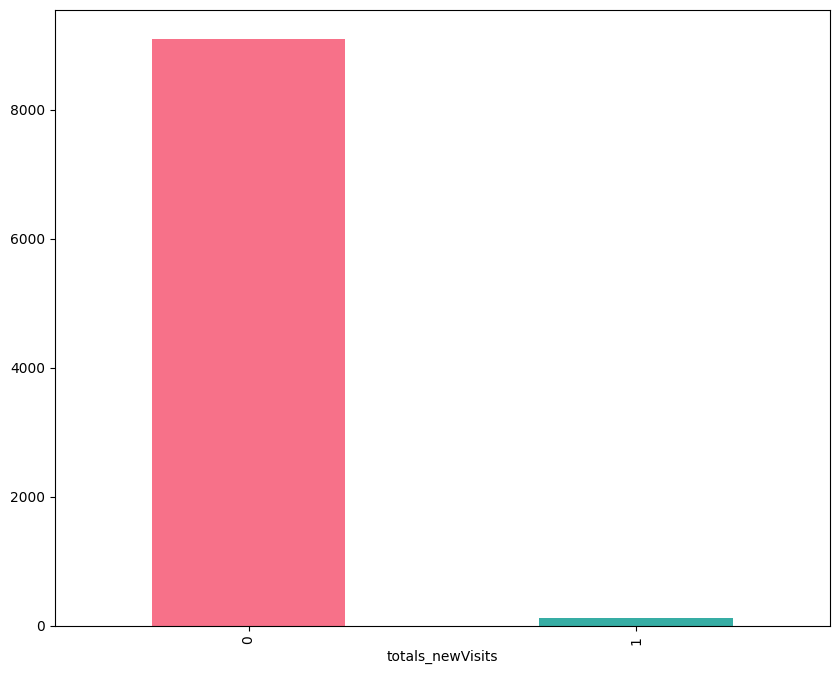

In [26]:
plot_cat("totals_newVisits")

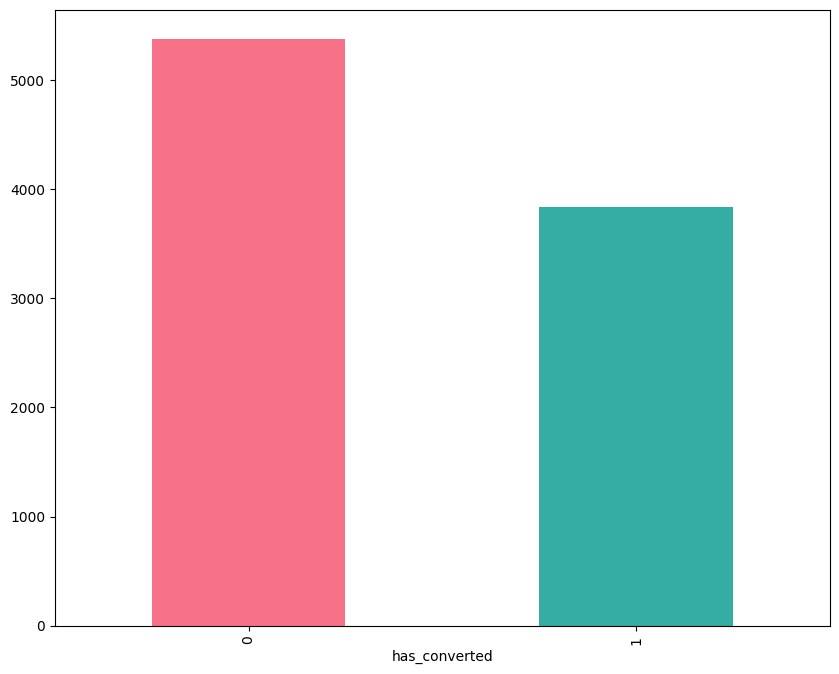

In [27]:
plot_cat("has_converted")

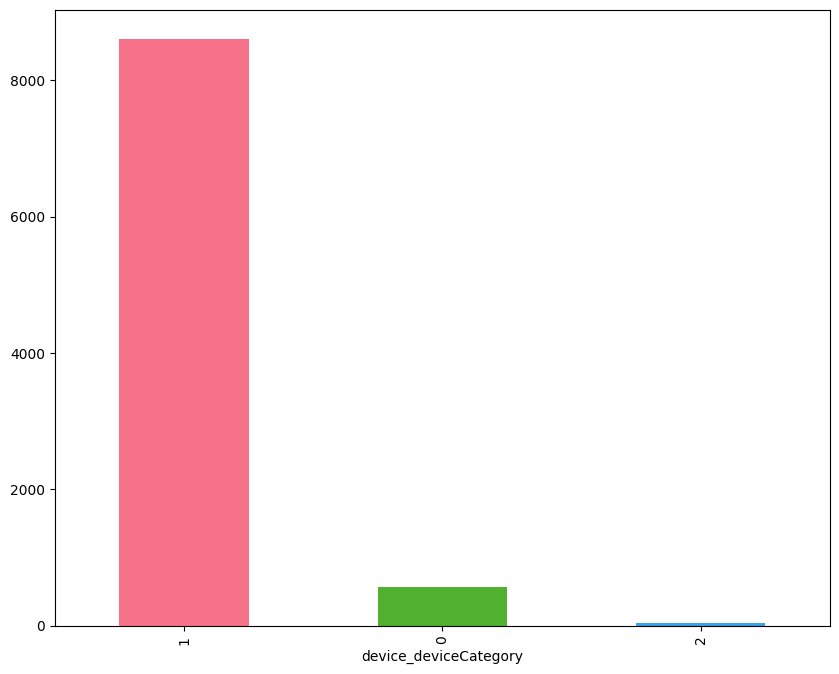

In [28]:
plot_cat("device_deviceCategory")

correlation:

In [29]:
data.corr()

count_session  count_hit  channelGrouping  \
count_session                1.000000   0.856096        -0.002417   
count_hit                    0.856096   1.000000         0.013933   
channelGrouping             -0.002417   0.013933         1.000000   
totals_newVisits            -0.088877  -0.075445         0.034250   
device_browser               0.111947   0.115239        -0.069322   
device_operatingSystem       0.045597   0.234980         0.146864   
device_isMobile              0.137204   0.146535        -0.093071   
device_deviceCategory        0.132393   0.142723        -0.093838   
geoNetwork_region           -0.056737  -0.087080        -0.025498   
geoNetwork_latitude         -0.000628   0.002825         0.037036   
geoNetwork_longitude         0.003505   0.005077         0.010981   
historic_session             0.839461   0.710085        -0.004442   
historic_session_page        0.238499   0.065334         0.030278   
youtube                           NaN        NaN              NaN   
avg_session_time            -0.097585  -0.065550         0.034710   
avg_session_time_page       -0.165082  -0.169826         0.068323   
single_page_rate             0.191493   0.214996        -0.090145   
sessionQualityDim           -0.100385  -0.138287         0.008953   
last_visitId                 0.203082   0.175670        -0.033074   
latest_visit_id              0.203082   0.175670        -0.033074   
visitId_threshold            0.203082   0.175670        -0.033074   
earliest_visit_id           -0.050703  -0.029274        -0.016792   
earliest_visit_number        0.239890   0.111591        -0.024194   
latest_visit_number          0.067875   0.035356        -0.022059   
time_earliest_visit         -0.000818   0.011861        -0.008726   
time_latest_visit            0.088479   0.086126        -0.003909   
avg_visit_time              -0.019165   0.000390        -0.014823   
days_since_last_visit             NaN        NaN              NaN   
days_since_first_visit       0.419399   0.339041        -0.027898   
visits_per_day               0.598173   0.752488         0.038934   
bounce_rate                 -0.006612  -0.043574         0.026490   
earliest_source              0.059223  -0.001779        -0.003815   
latest_source                0.002415  -0.010475        -0.089467   
earliest_medium              0.057011  -0.024851        -0.024249   
latest_medium                0.005399   0.003973         0.058136   
earliest_keyword            -0.036634   0.023835         0.237873   
latest_keyword              -0.010616   0.005351         0.348827   
earliest_isTrueDirect        0.140833   0.158377        -0.040494   
latest_isTrueDirect          0.118986   0.129847        -0.035887   
num_interactions             0.760016   0.871843         0.025076   
bounces                      0.044868   0.051623         0.011748   
time_on_site                 0.153830   0.093644         0.002482   
transactionRevenue           0.091560   0.088279         0.006980   
products_array               0.070176  -0.029933        -0.120481   
has_converted                0.100391   0.228865         0.092067   
target_date                       NaN        NaN              NaN   

                        totals_newVisits  device_browser  \
count_session                  -0.088877        0.111947   
count_hit                      -0.075445        0.115239   
channelGrouping                 0.034250       -0.069322   
totals_newVisits                1.000000       -0.149279   
device_browser                 -0.149279        1.000000   
device_operatingSystem          0.070804       -0.069150   
device_isMobile                -0.236885        0.749035   
device_deviceCategory          -0.226040        0.723994   
geoNetwork_region              -0.009770        0.006916   
geoNetwork_latitude             0.003611       -0.003827   
geoNetwork_longitude            0.010310        0.004427   
historic_session               -0.055747        0.032895   


<Axes: >

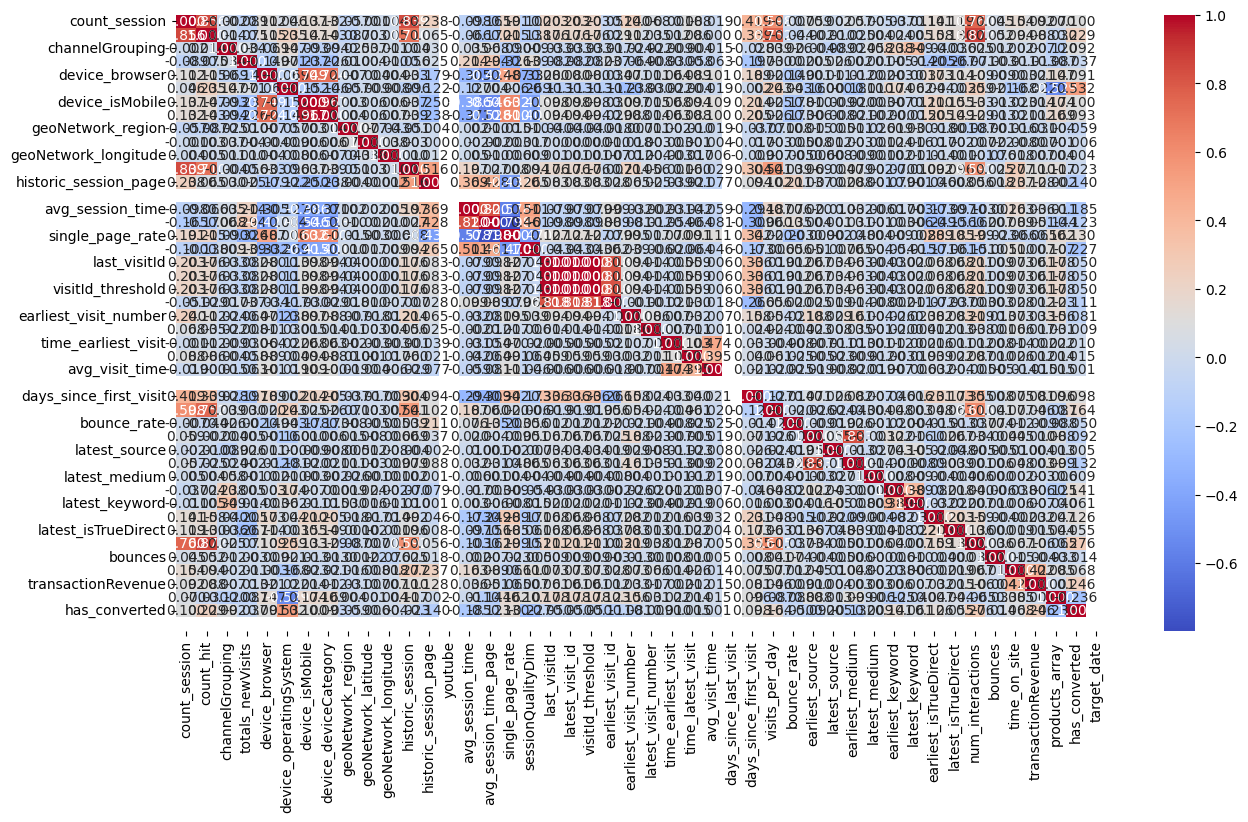

In [30]:
corr_data = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_data,annot=True,cmap="coolwarm",fmt=".3f")

In [31]:
hig_corr = set()

for i in range(len(corr_data.columns)):
    for j in range(i):
        corr = corr_data.iloc[i,j]
        columns_name = corr_data.columns[i]
        if abs(corr) > 0.9:
            hig_corr.add(columns_name)

In [32]:
hig_corr

{'device_deviceCategory', 'latest_visit_id', 'visitId_threshold'}

In [33]:
data_2 = data.drop(['device_deviceCategory', 'latest_visit_id', 'visitId_threshold'],axis=1)

In [34]:
data_2

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
16                 3        507                2                 0   
20                 9       1037                2                 0   
...              ...        ...              ...               ...   
99888              1        195                2                 0   
99907             28       3071                2                 0   
99908              7       1018                2                 0   
99921              6        818                2                 0   
99934             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       latest_keyword  earliest_isTrueDirect  latest_isTrueDirect  \
0                   2                      1                    1   
2                   1                      1                    1   
3                  96                      1                    1   
16                 95                      1                    1   
20                  2                      1                    1   
...               ...                    ...                  ...   
99888              68                      1                    1   
99907              95                      1                    1   
99908              95                      1                    1   
99921              31                      1                    1   
99934              96                      1                    1   

       num_interactions  bounces  time_on_site  transactionRevenue  \
0                  1900        0          5617                   0   
2                  3843        0         77417          1477195214   
3                   592        0          1576                   0   
16                  507        0          1958            28745286   
20                 1674        0        138440          1054124685   
...                 ...      ...           ...                 ...   
99888               471        0           278                   0   
99907              4071        0          3810           183879066   
9

outliers detection and treating:

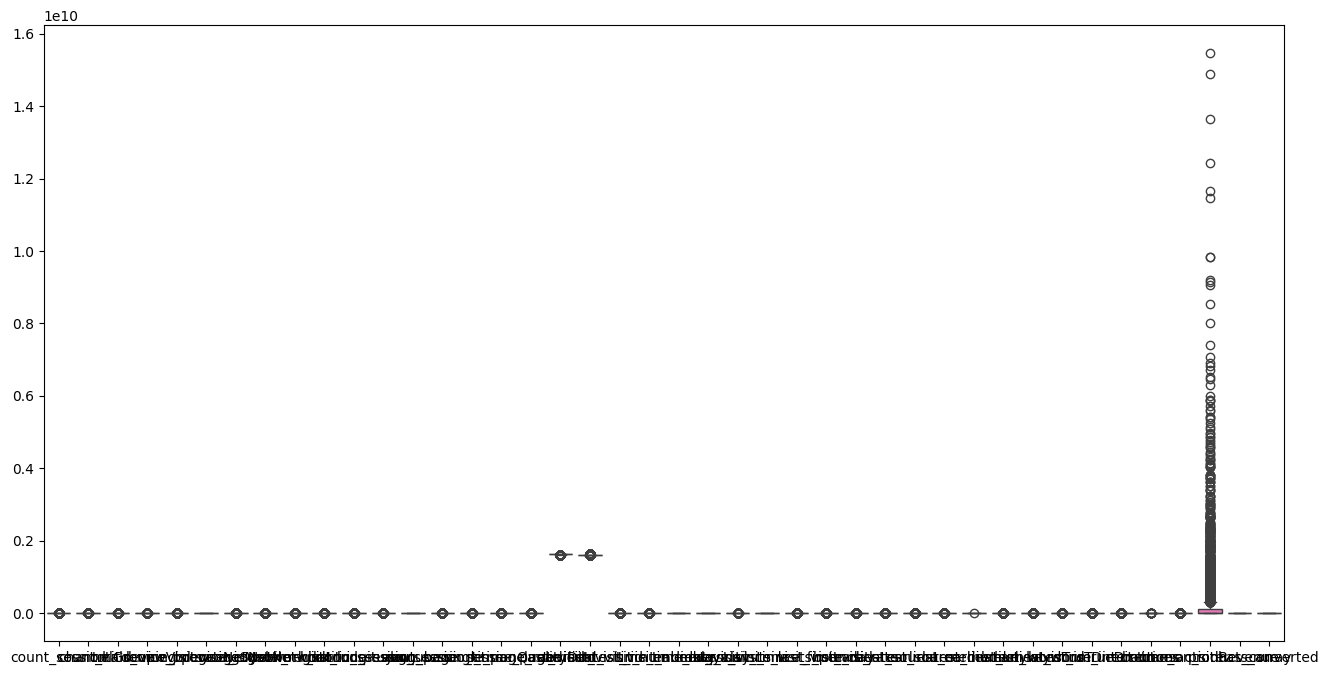

In [35]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_2)
plt.show()

In [36]:
data_2

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
16                 3        507                2                 0   
20                 9       1037                2                 0   
...              ...        ...              ...               ...   
99888              1        195                2                 0   
99907             28       3071                2                 0   
99908              7       1018                2                 0   
99921              6        818                2                 0   
99934             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       latest_keyword  earliest_isTrueDirect  latest_isTrueDirect  \
0                   2                      1                    1   
2                   1                      1                    1   
3                  96                      1                    1   
16                 95                      1                    1   
20                  2                      1                    1   
...               ...                    ...                  ...   
99888              68                      1                    1   
99907              95                      1                    1   
99908              95                      1                    1   
99921              31                      1                    1   
99934              96                      1                    1   

       num_interactions  bounces  time_on_site  transactionRevenue  \
0                  1900        0          5617                   0   
2                  3843        0         77417          1477195214   
3                   592        0          1576                   0   
16                  507        0          1958            28745286   
20                 1674        0        138440          1054124685   
...                 ...      ...           ...                 ...   
99888               471        0           278                   0   
99907              4071        0          3810           183879066   
9

In [37]:
data_2.replace([np.inf,-np.inf],np.nan,inplace=True)

In [38]:
data_2.interpolate(inplace=True)

In [39]:
data_3 = data_2.drop("products_array",axis=1)

In [40]:
data_3

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
16                 3        507                2                 0   
20                 9       1037                2                 0   
...              ...        ...              ...               ...   
99888              1        195                2                 0   
99907             28       3071                2                 0   
99908              7       1018                2                 0   
99921              6        818                2                 0   
99934             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                     3               2                      1   
2                     3               1                      1   
3                    89              96                      1   
16                   88              95                      1   
20                    3               2                      1   
...                 ...             ...                    ...   
99888                61              68                      1   
99907                90              95                      1   
99908                88              95                      1   
99921                 3              31                      1   
99934                89              96                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1              1900        0          5617   
2                        1              3843        0         77417   
3                        1               592        0          1576   
16                       1               507        0          1958   
20                       1              1674        0        138440   
...                    ...               ...      ...           ...   
99888                    1               471        0           278   
99907                    1              4071        0          3810   
99908                    1  

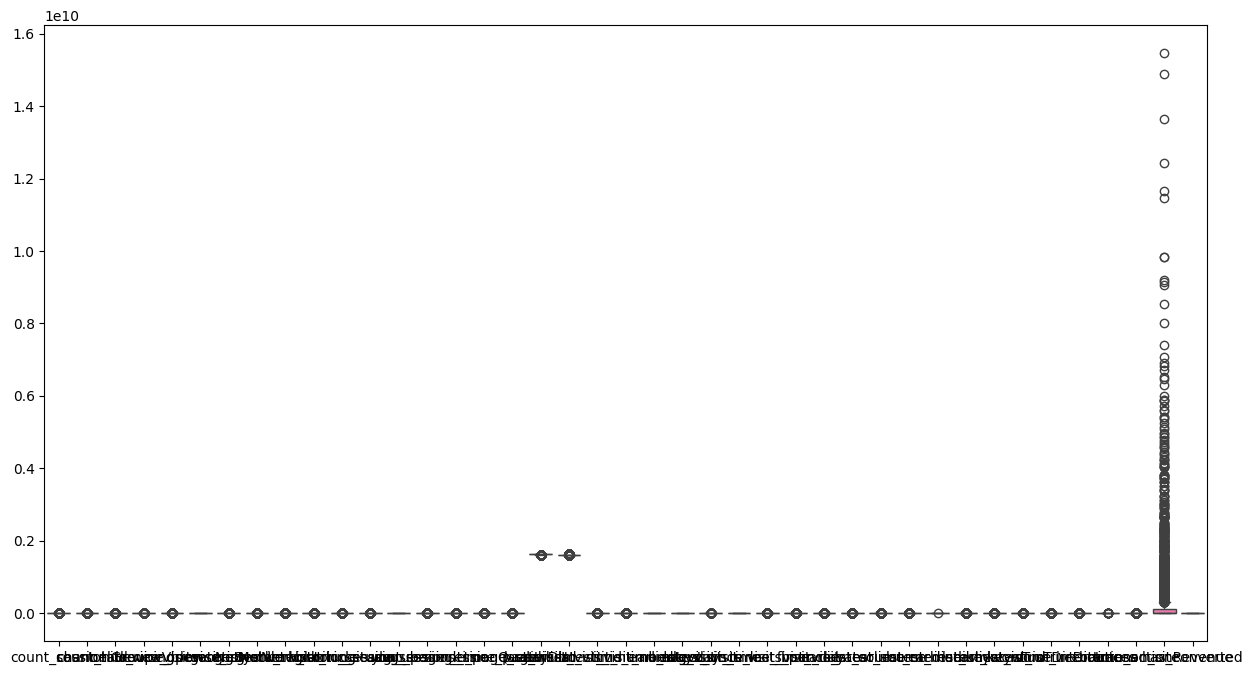

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_3)
plt.show()

In [42]:
data_4 = data_3.copy()
data_4["transactionRevenue"]=1/data_3["transactionRevenue"]

In [43]:
data_4.replace([np.inf,-np.inf], np.nan, inplace=True)

In [44]:
data_4.interpolate(inplace=True)

In [45]:
data_4["transactionRevenue"] = data_4["transactionRevenue"].fillna(data_4["transactionRevenue"].mean())

In [46]:
data_4

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
16                 3        507                2                 0   
20                 9       1037                2                 0   
...              ...        ...              ...               ...   
99888              1        195                2                 0   
99907             28       3071                2                 0   
99908              7       1018                2                 0   
99921              6        818                2                 0   
99934             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                     3               2                      1   
2                     3               1                      1   
3                    89              96                      1   
16                   88              95                      1   
20                    3               2                      1   
...                 ...             ...                    ...   
99888                61              68                      1   
99907                90              95                      1   
99908                88              95                      1   
99921                 3              31                      1   
99934                89              96                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1              1900        0          5617   
2                        1              3843        0         77417   
3                        1               592        0          1576   
16                       1               507        0          1958   
20                       1              1674        0        138440   
...                    ...               ...      ...           ...   
99888                    1               471        0           278   
99907                    1              4071        0          3810   
99908                    1  

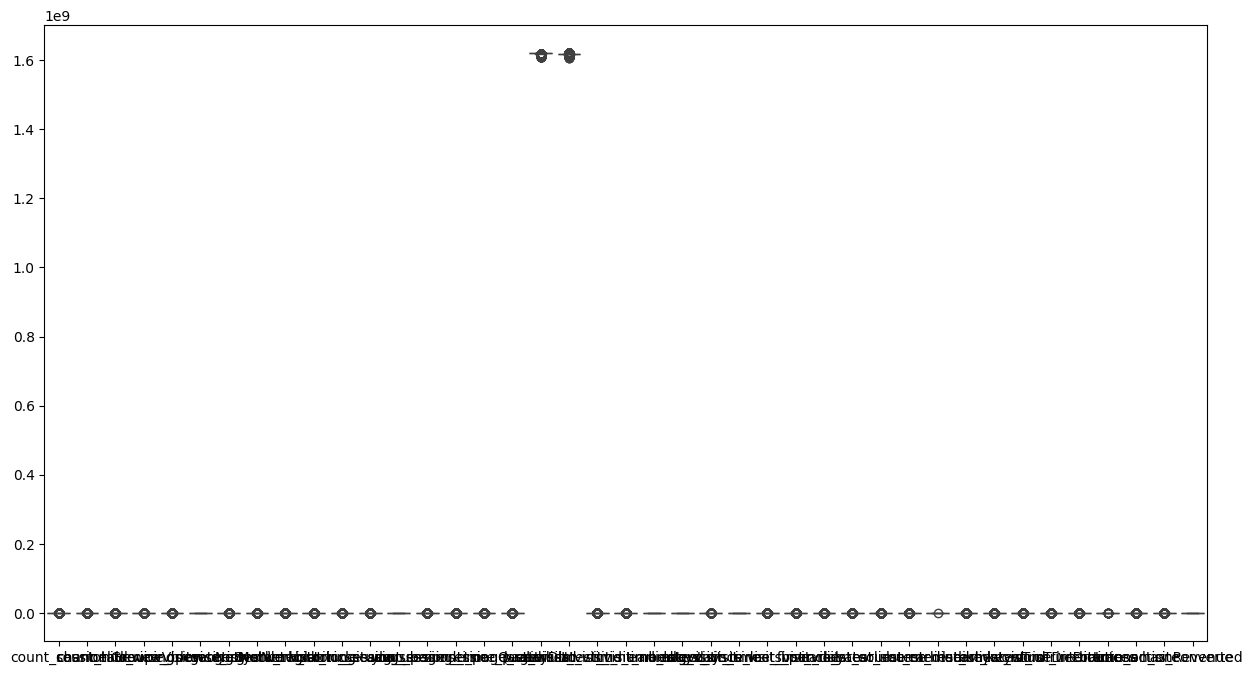

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data = data_4)
plt.show()

In [48]:
data_4

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
16                 3        507                2                 0   
20                 9       1037                2                 0   
...              ...        ...              ...               ...   
99888              1        195                2                 0   
99907             28       3071                2                 0   
99908              7       1018                2                 0   
99921              6        818                2                 0   
99934             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                     3               2                      1   
2                     3               1                      1   
3                    89              96                      1   
16                   88              95                      1   
20                    3               2                      1   
...                 ...             ...                    ...   
99888                61              68                      1   
99907                90              95                      1   
99908                88              95                      1   
99921                 3              31                      1   
99934                89              96                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1              1900        0          5617   
2                        1              3843        0         77417   
3                        1               592        0          1576   
16                       1               507        0          1958   
20                       1              1674        0        138440   
...                    ...               ...      ...           ...   
99888                    1               471        0           278   
99907                    1              4071        0          3810   
99908                    1  

In [49]:
data_5 = data_4.copy()
data_5["latest_keyword"] = 1/data_4["latest_keyword"]
data_5["latest_medium"] = 1/data_4["latest_medium"]

In [50]:
data_5['latest_keyword'] = data_5['latest_keyword'].fillna(data_5['latest_keyword'].mean())
data_5['latest_medium'] = data_5['latest_medium'].fillna(data_5['latest_medium'].mean())

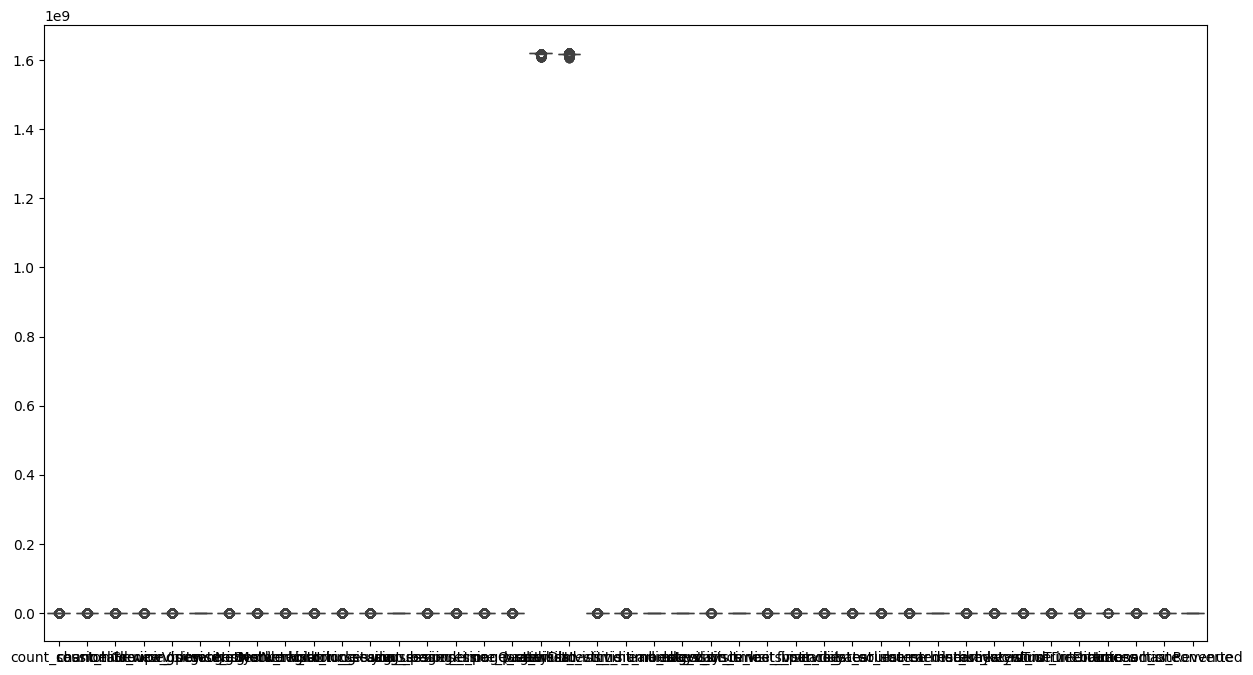

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_5)
plt.show()

In [52]:
data_5

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
16                 3        507                2                 0   
20                 9       1037                2                 0   
...              ...        ...              ...               ...   
99888              1        195                2                 0   
99907             28       3071                2                 0   
99908              7       1018                2                 0   
99921              6        818                2                 0   
99934             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                     3        0.500000                      1   
2                     3        1.000000                      1   
3                    89        0.010417                      1   
16                   88        0.010526                      1   
20                    3        0.500000                      1   
...                 ...             ...                    ...   
99888                61        0.014706                      1   
99907                90        0.010526                      1   
99908                88        0.010526                      1   
99921                 3        0.032258                      1   
99934                89        0.010417                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1              1900        0          5617   
2                        1              3843        0         77417   
3                        1               592        0          1576   
16                       1               507        0          1958   
20                       1              1674        0        138440   
...                    ...               ...      ...           ...   
99888                    1               471        0           278   
99907                    1              4071        0          3810   
99908                    1  

Graphical Representation:

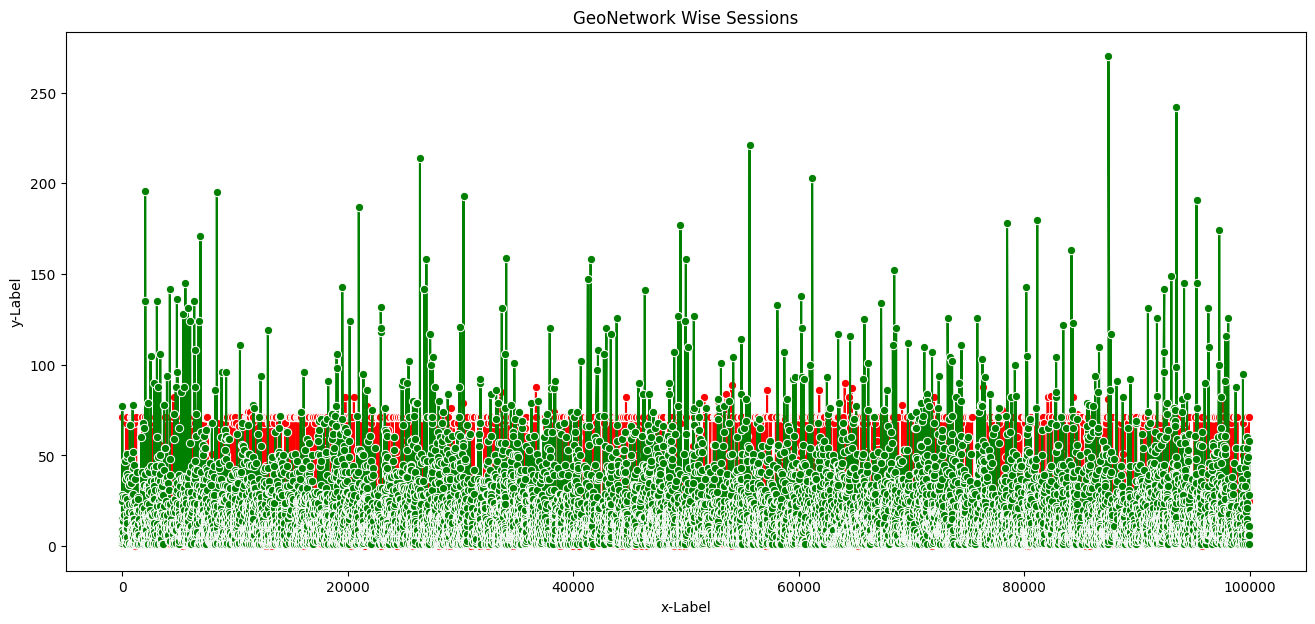

In [53]:
fig, a = plt.subplots(figsize=(16,7))

sns.lineplot(data=data_5, x=data_5.index,y="geoNetwork_region",marker='o',color="red")
sns.lineplot(data=data_5, x=data_5.index,y="count_session",marker='o',color="green")
plt.title("GeoNetwork Wise Sessions")
plt.xlabel("x-Label")
plt.ylabel("y-Label")
plt.show()

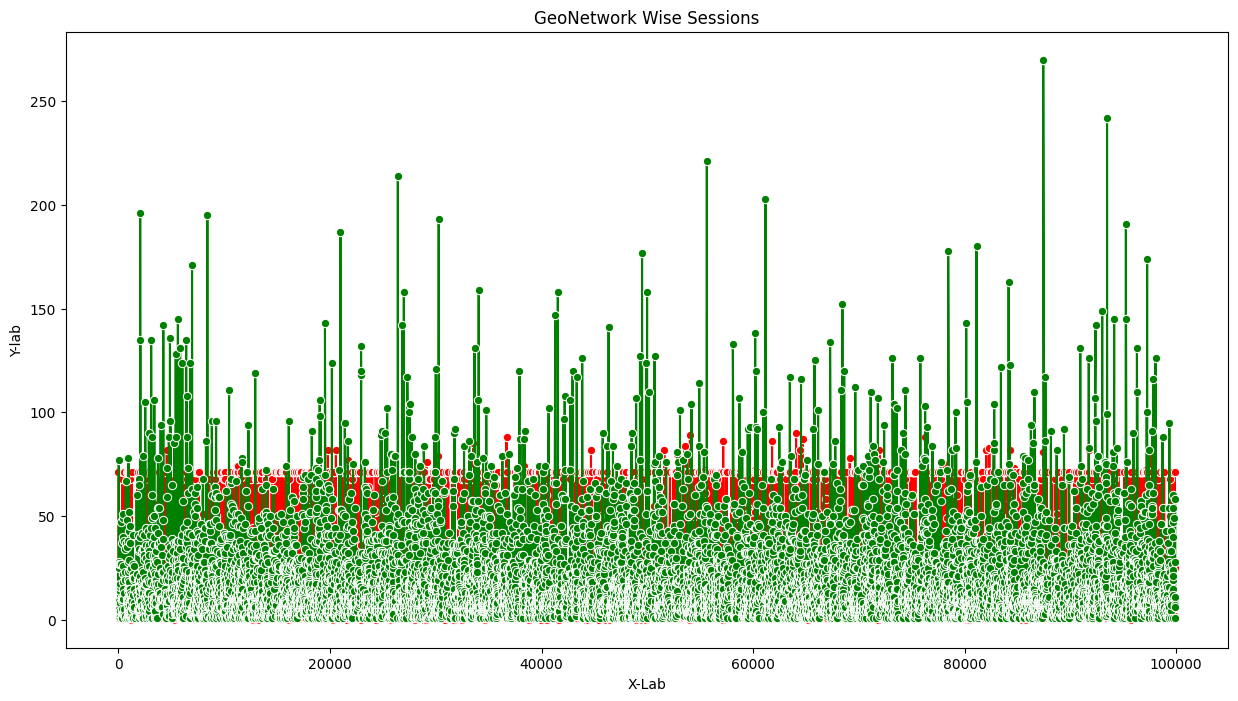

In [54]:
fig, a = plt.subplots(figsize=(15,8))

sns.lineplot(data=data_5, x=data_5.index,y="geoNetwork_region",marker='o',color='red')
sns.lineplot(data=data_5, x=data_5.index,y="count_session",marker='o',color="green")
plt.title("GeoNetwork Wise Sessions")
plt.xlabel("X-Lab")
plt.ylabel("Y-lab")
plt.show()

Verifying the Normalization in Data Set

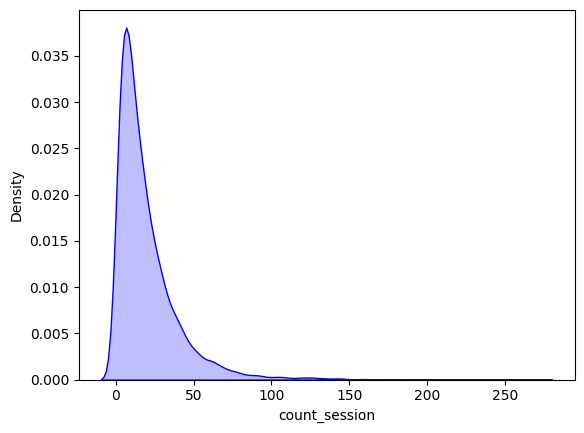

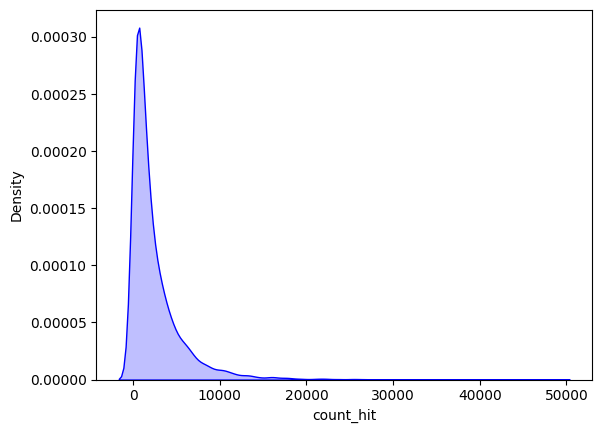

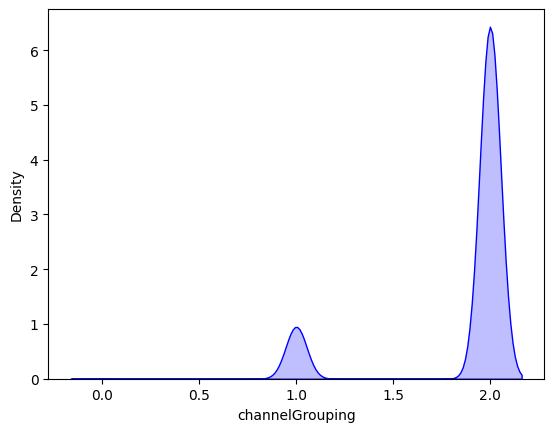

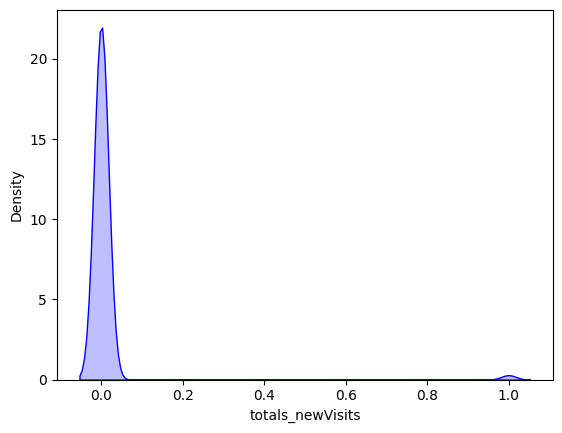

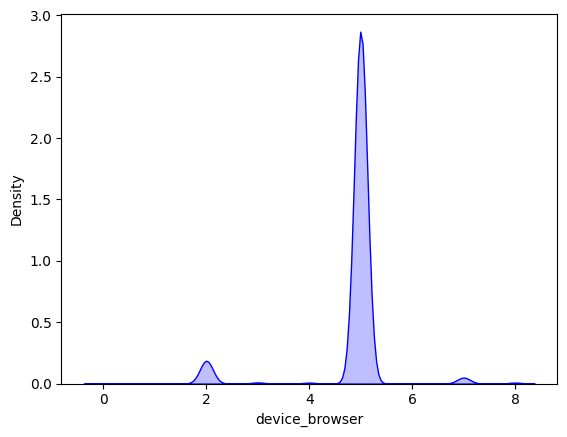

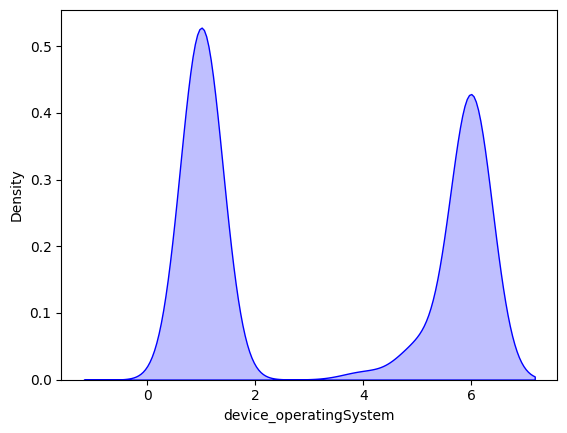

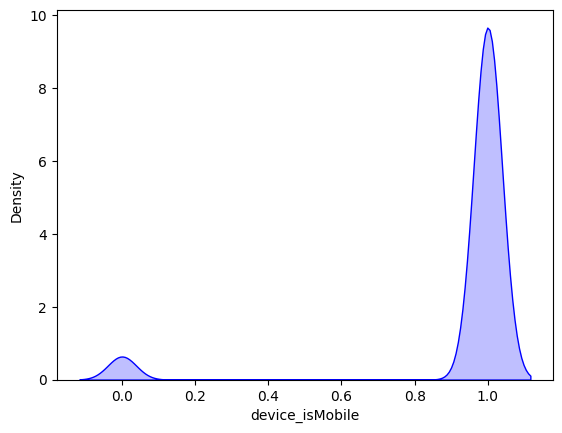

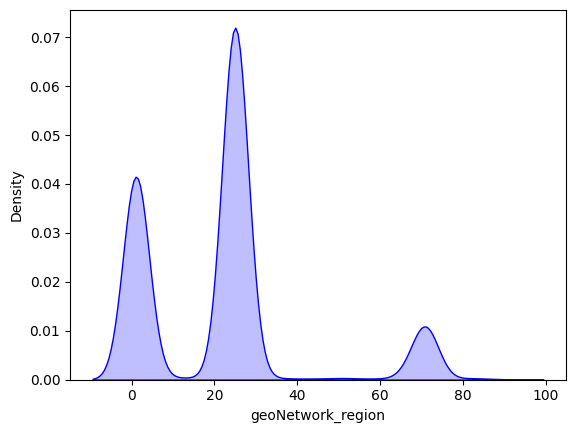

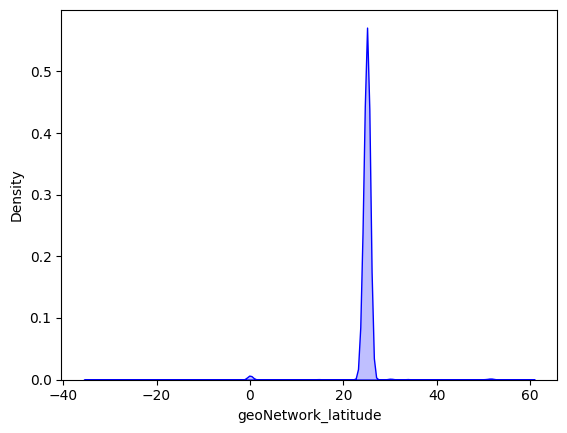

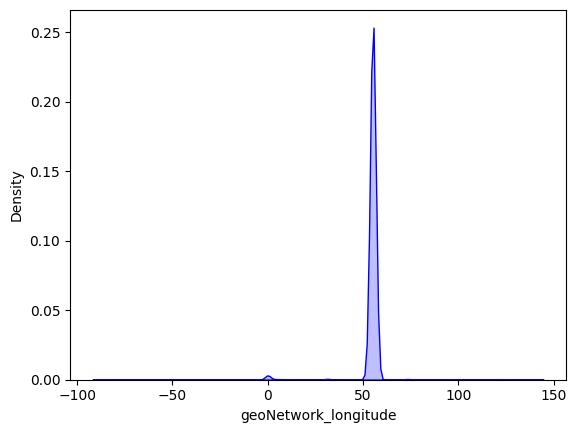

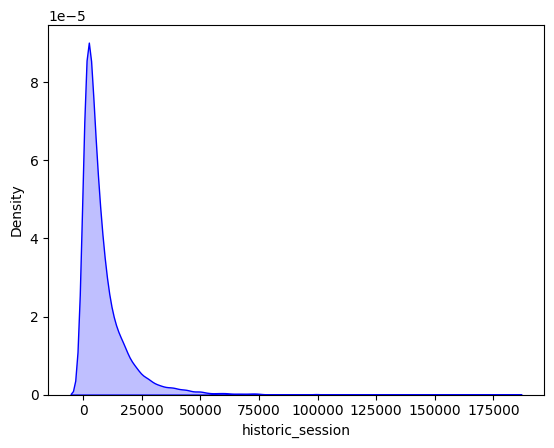

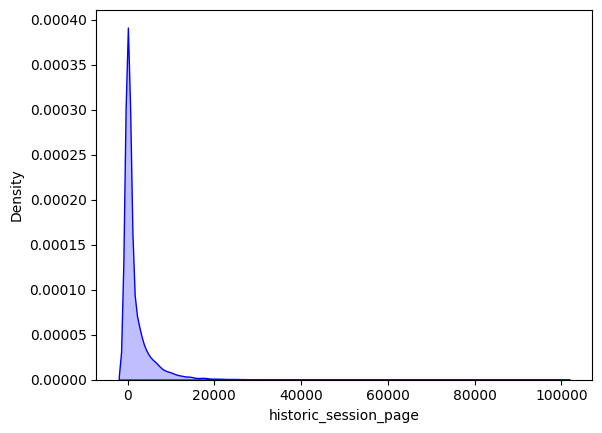

C:\Users\SUBIN.S\AppData\Local\Temp\ipykernel_1764\593055729.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data_5[i],fill= True,color='b')


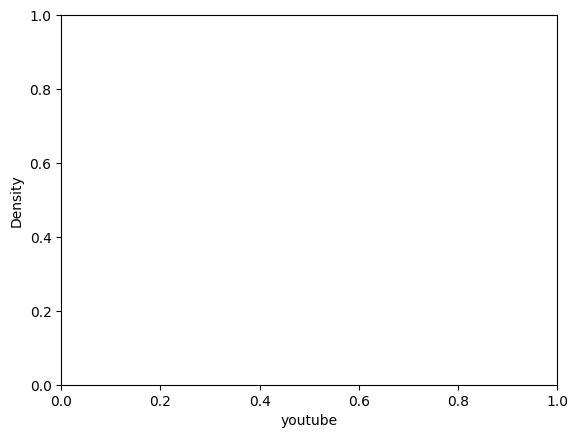

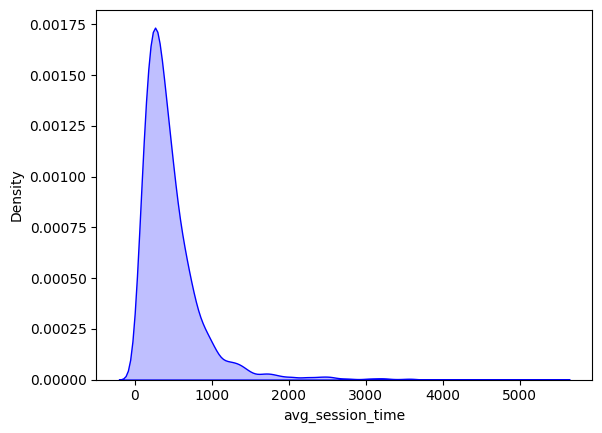

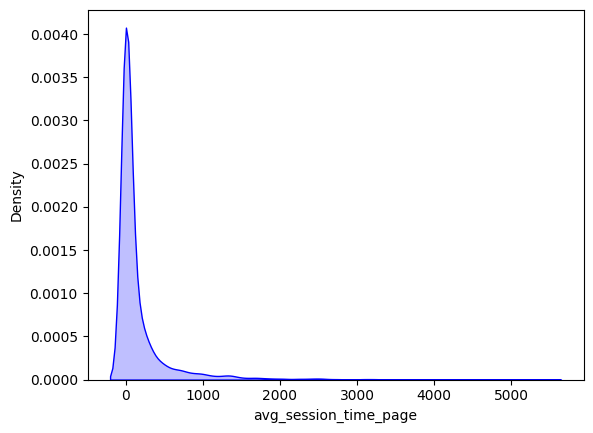

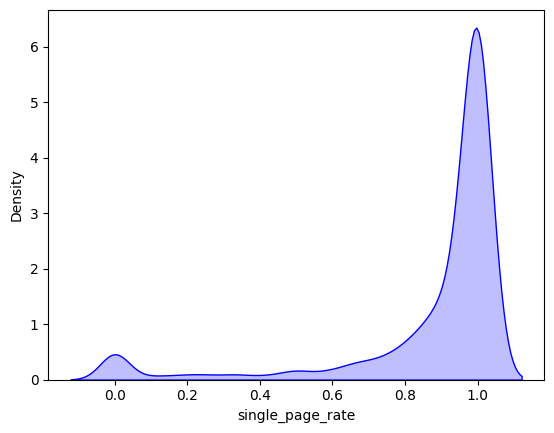

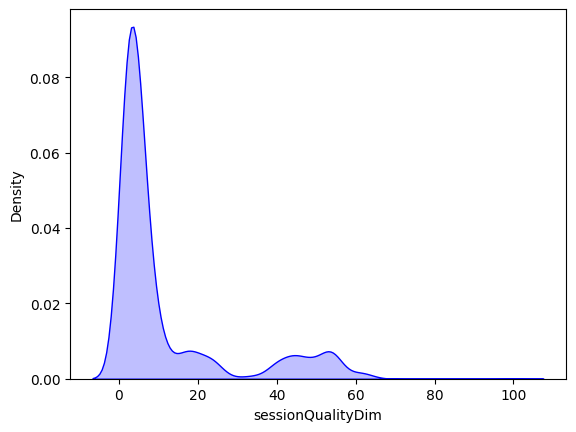

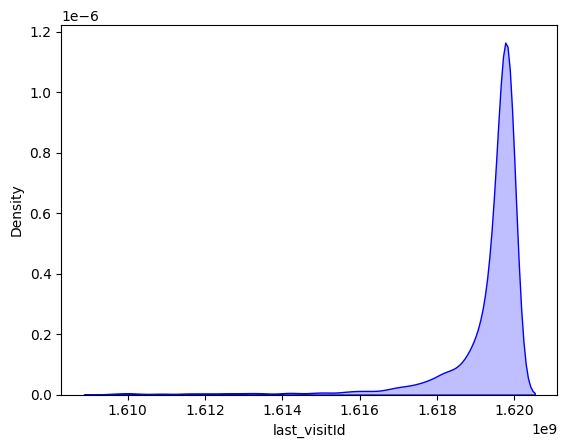

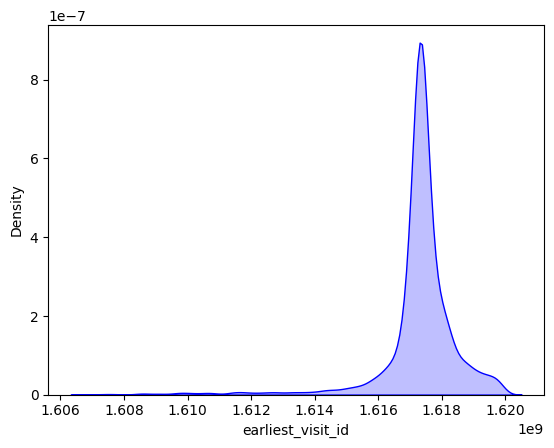

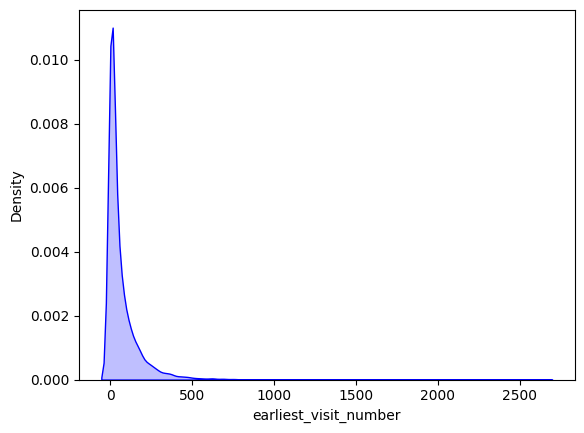

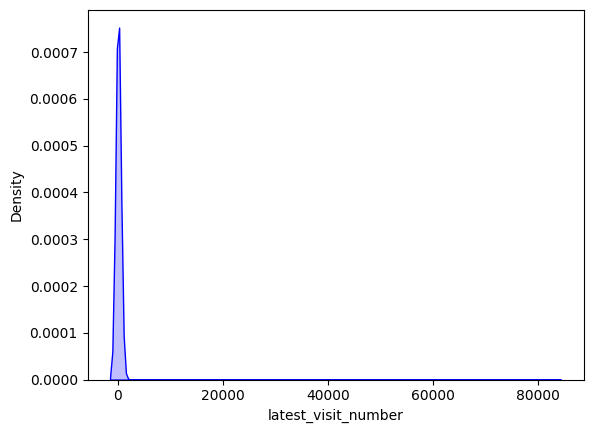

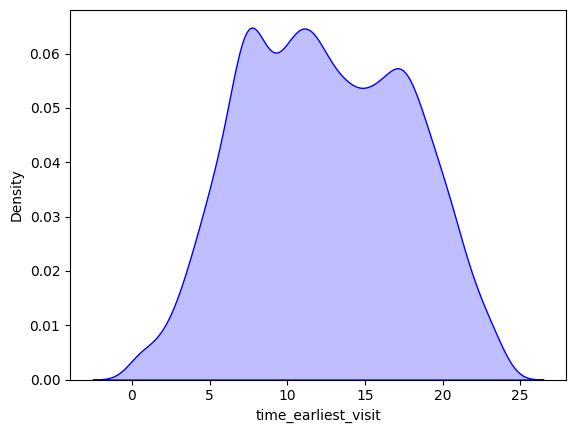

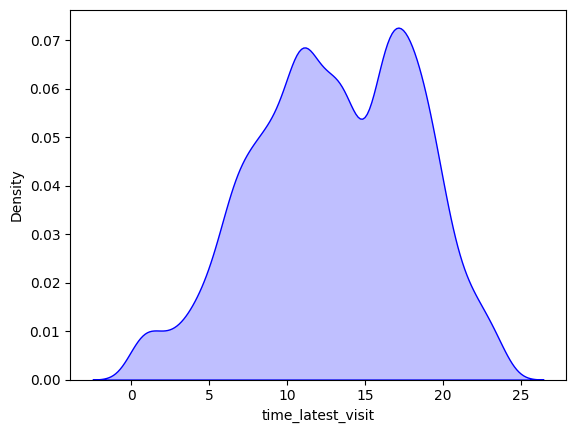

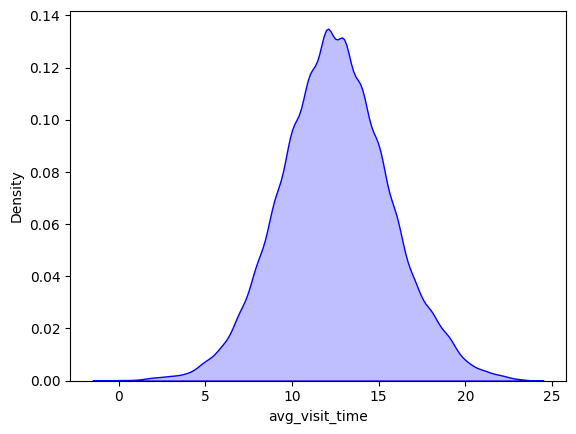

C:\Users\SUBIN.S\AppData\Local\Temp\ipykernel_1764\593055729.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data_5[i],fill= True,color='b')


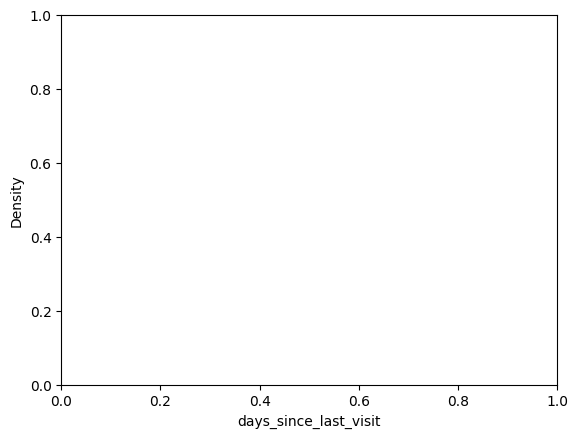

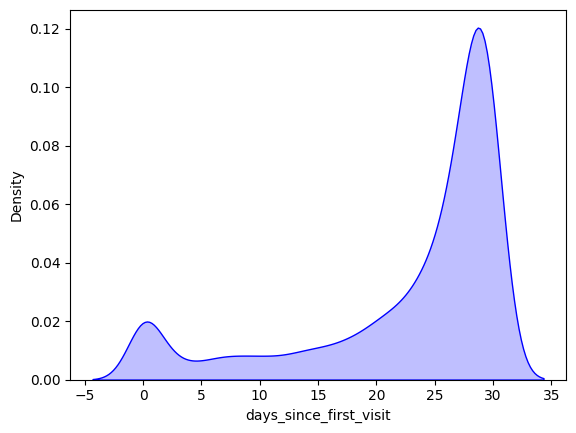

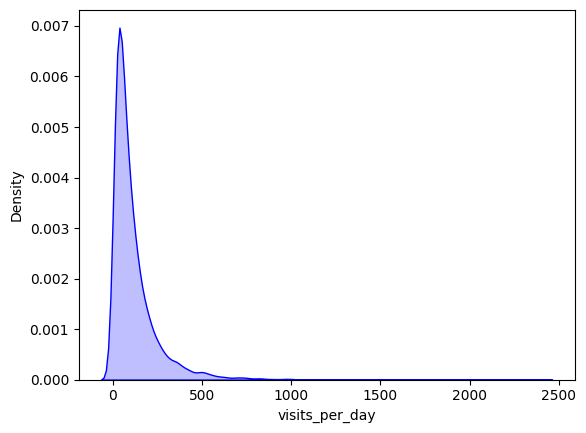

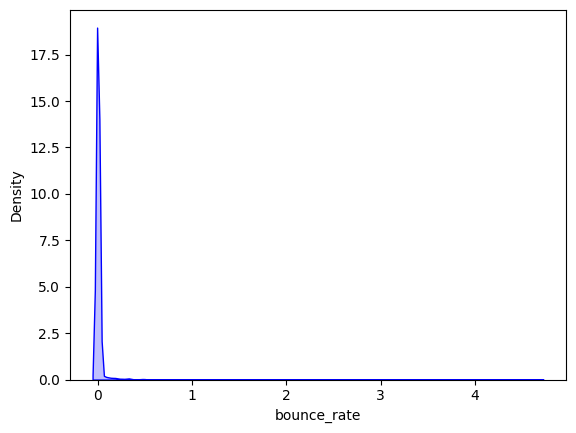

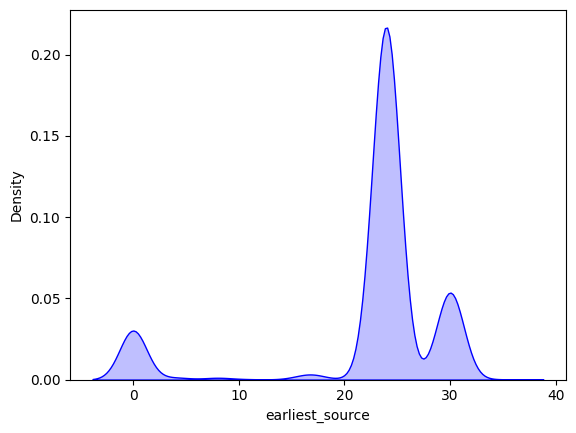

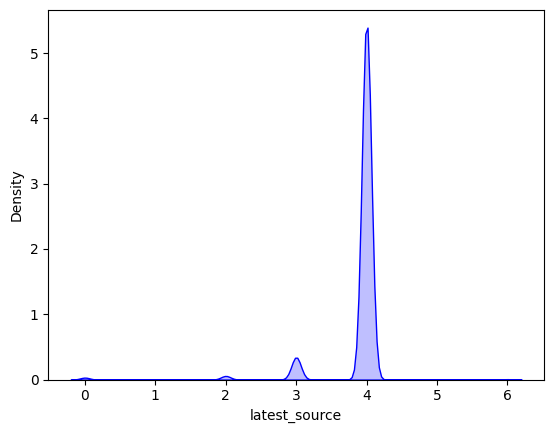

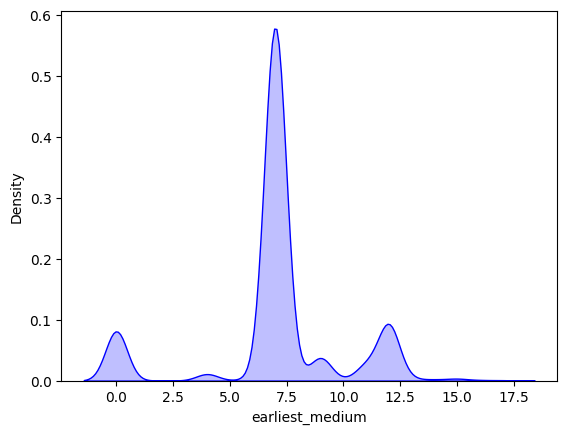

C:\Users\SUBIN.S\AppData\Local\Temp\ipykernel_1764\593055729.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data_5[i],fill= True,color='b')


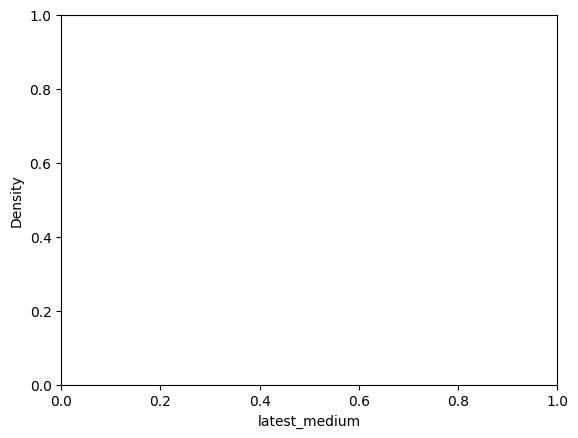

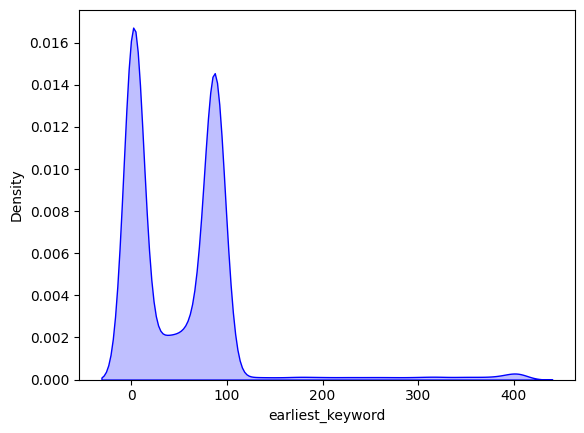

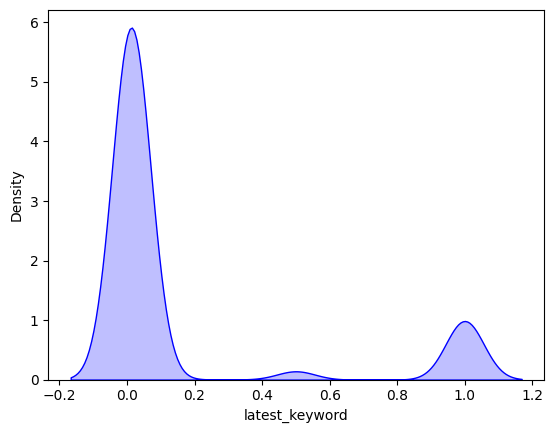

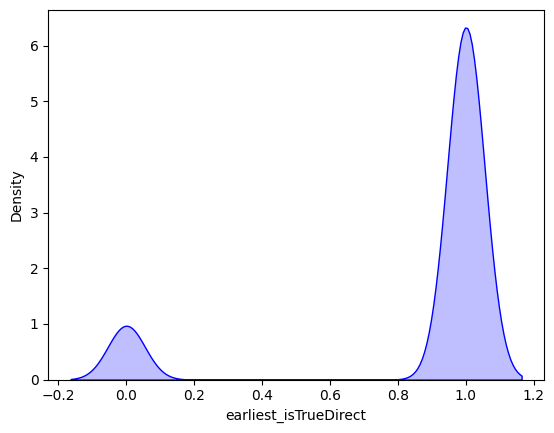

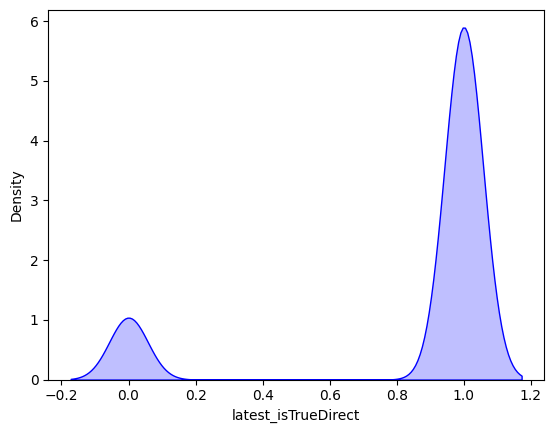

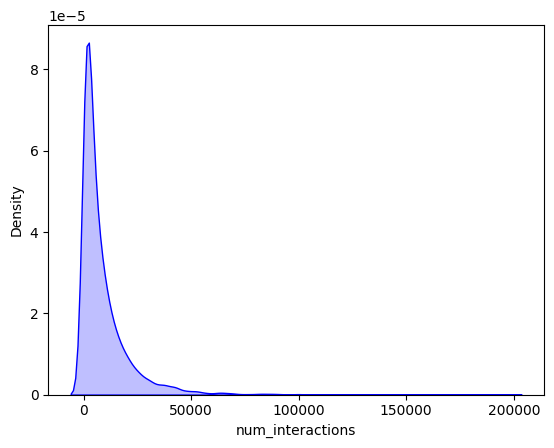

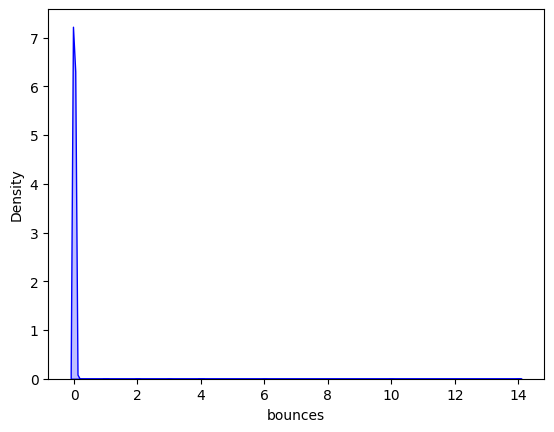

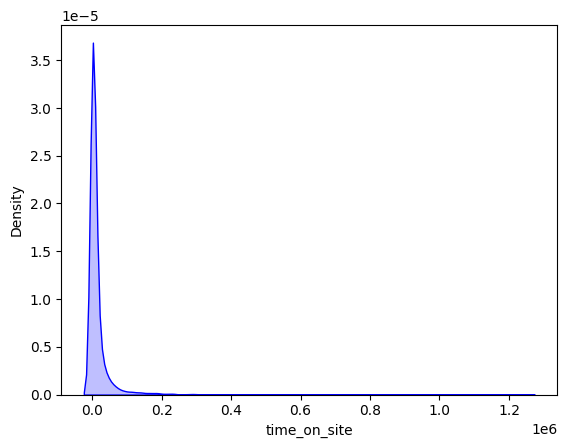

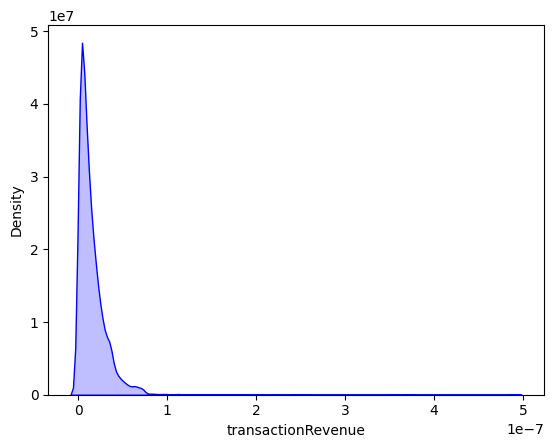

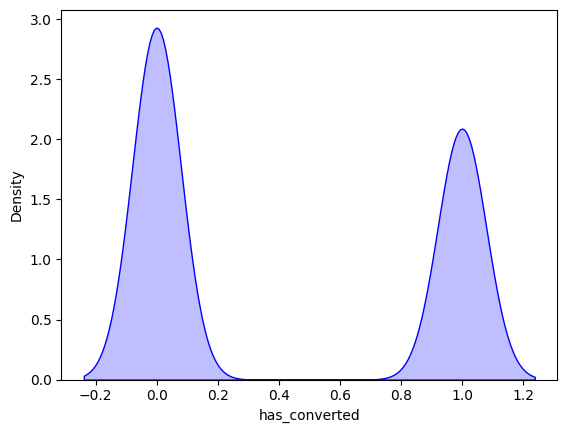

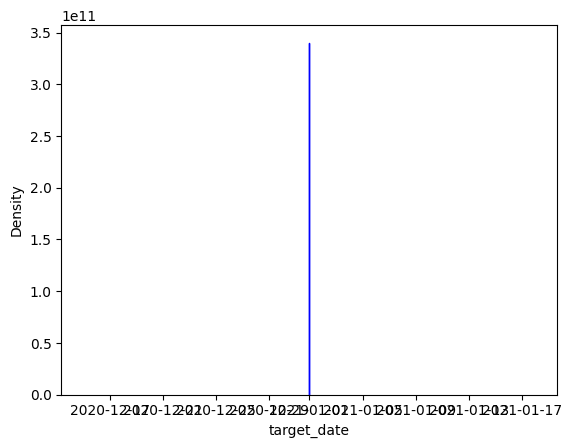

In [55]:
columns_name = data_5.columns
for i in columns_name:
    sns.kdeplot(data = data_5[i],fill= True,color='b')
    plt.show()

Feature importance

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
data_5.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'geoNetwork_region', 'geoNetwork_latitude', 'geoNetwork_longitude',
       'historic_session', 'historic_session_page', 'youtube',
       'avg_session_time', 'avg_session_time_page', 'single_page_rate',
       'sessionQualityDim', 'last_visitId', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'has_converted', 'target_date'],
      dtype='object')

In [58]:
data_5

count_session  count_hit  channelGrouping  totals_newVisits  \
0                  9       1194                0                 0   
2                 28       1816                2                 0   
3                  2        299                2                 0   
16                 3        507                2                 0   
20                 9       1037                2                 0   
...              ...        ...              ...               ...   
99888              1        195                2                 0   
99907             28       3071                2                 0   
99908              7       1018                2                 0   
99921              6        818                2                 0   
99934             58      12340                2                 0   

       device_browser  device_operatingSystem  device_isMobile  \
0                   5                       1                1   
2                   5                       1                1   
3                   5                       1                1   
16                  5                       6                1   
20                  5                       1                1   
...               ...                     ...              ...   
99888               5                       6                1   
99907               5                       1                1   
99908               5                       6                1   
99921               5                       1                1   
99934               5                       6                1   

       geoNetwork_region  geoNetwork_latitude  geoNetwork_longitude  ...  \
0                     71              25.3463               55.4209  ...   
2                      2              25.4052               55.5136  ...   
3                      1              24.4539               54.3773  ...   
16                     1              24.4539               54.3773  ...   
20                    25              25.2048               55.2708  ...   
...                  ...                  ...                   ...  ...   
99888                  1              24.4539               54.3773  ...   
99907                  1              24.4539               54.3773  ...   
99908                 25              25.2048               55.2708  ...   
99921                 25              25.2048               55.2708  ...   
99934                 25              25.2048               55.2708  ...   

       earliest_keyword  latest_keyword  earliest_isTrueDirect  \
0                     3        0.500000                      1   
2                     3        1.000000                      1   
3                    89        0.010417                      1   
16                   88        0.010526                      1   
20                    3        0.500000                      1   
...                 ...             ...                    ...   
99888                61        0.014706                      1   
99907                90        0.010526                      1   
99908                88        0.010526                      1   
99921                 3        0.032258                      1   
99934                89        0.010417                      1   

       latest_isTrueDirect  num_interactions  bounces  time_on_site  \
0                        1              1900        0          5617   
2                        1              3843        0         77417   
3                        1               592        0          1576   
16                       1               507        0          1958   
20                       1              1674        0        138440   
...                    ...               ...      ...           ...   
99888                    1               471        0           278   
99907                    1              4071        0          3810   
99908                    1  

In [59]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   count_session           9207 non-null   int64         
 1   count_hit               9207 non-null   int64         
 2   channelGrouping         9207 non-null   int32         
 3   totals_newVisits        9207 non-null   int64         
 4   device_browser          9207 non-null   int32         
 5   device_operatingSystem  9207 non-null   int32         
 6   device_isMobile         9207 non-null   int64         
 7   geoNetwork_region       9207 non-null   int32         
 8   geoNetwork_latitude     9207 non-null   float64       
 9   geoNetwork_longitude    9207 non-null   float64       
 10  historic_session        9207 non-null   int64         
 11  historic_session_page   9207 non-null   int64         
 12  youtube                 9207 non-null   int64       

In [60]:
data_5["latest_medium"] = data_5["latest_medium"].fillna(data_5["latest_medium"].mean())
data_5["latest_keyword"] = data_5["latest_keyword"].fillna(data_5["latest_keyword"].mean())

In [61]:
data_5.isnull().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword          0
latest_keyword            0
earliest_isTrueDirect     0
latest_isTrueDirect 

In [62]:
data_5 = data_5.drop("transactionRevenue",axis=1)

In [63]:
x=data_5.drop("target_date",axis=1)
y=data_5["target_date"]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [66]:
rf_model = RandomForestClassifier(n_estimators=20,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler

check the infinity or Large values

In [68]:
print("Infinity values:", np.any(np.isinf(x_train)))
print("NaN values:", np.any(np.isnan(x_train)))

Infinity values: True
NaN values: False


In [69]:
x_train[~np.isfinite(x_train)] = np.finfo(np.float32).max

Scale Feature:

In [70]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [71]:
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [72]:
rf_model.feature_importances_*100

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [73]:
pd.DataFrame({
    "columns":x.columns,
    "impt_score":rf_model.feature_importances_*100
}).sort_values("impt_score",ascending=False).head(20)['columns']

0              count_session
1                  count_hit
22         time_latest_visit
23            avg_visit_time
24     days_since_last_visit
25    days_since_first_visit
26            visits_per_day
27               bounce_rate
28           earliest_source
29             latest_source
30           earliest_medium
31             latest_medium
32          earliest_keyword
33            latest_keyword
34     earliest_isTrueDirect
35       latest_isTrueDirect
36          num_interactions
37                   bounces
38              time_on_site
21       time_earliest_visit
Name: columns, dtype: object

In [74]:
data_6 = x[["count_session","time_latest_visit","avg_visit_time","days_since_last_visit","days_since_first_visit","visits_per_day","bounce_rate","earliest_source","latest_source","earliest_medium","latest_medium","earliest_keyword","latest_keyword","earliest_isTrueDirect","latest_isTrueDirect","num_interactions","bounces","time_on_site","has_converted","time_earliest_visit"]]

In [75]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 0 to 99934
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count_session           9207 non-null   int64  
 1   time_latest_visit       9207 non-null   float64
 2   avg_visit_time          9207 non-null   int64  
 3   days_since_last_visit   9207 non-null   int64  
 4   days_since_first_visit  9207 non-null   int64  
 5   visits_per_day          9207 non-null   float64
 6   bounce_rate             9207 non-null   float64
 7   earliest_source         9207 non-null   int32  
 8   latest_source           9207 non-null   int32  
 9   earliest_medium         9207 non-null   int32  
 10  latest_medium           9207 non-null   float64
 11  earliest_keyword        9207 non-null   int32  
 12  latest_keyword          9207 non-null   float64
 13  earliest_isTrueDirect   9207 non-null   int64  
 14  latest_isTrueDirect     9207 non-null   int6

In [76]:
data_6[np.isinf(data_6)] = np.nan
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
data_7 = imputer.fit_transform(data_6)

C:\Users\SUBIN.S\AppData\Local\Temp\ipykernel_1764\238351468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6[np.isinf(data_6)] = np.nan
C:\Users\SUBIN.S\AppData\Local\Temp\ipykernel_1764\238351468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6[np.isinf(data_6)] = np.nan


In [77]:
data_6["latest_medium"] = data_6["latest_medium"].fillna(0)
data_6["latest_keyword"] = data_6["latest_keyword"].fillna(0)

C:\Users\SUBIN.S\AppData\Local\Temp\ipykernel_1764\2970116436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6["latest_medium"] = data_6["latest_medium"].fillna(0)
C:\Users\SUBIN.S\AppData\Local\Temp\ipykernel_1764\2970116436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6["latest_keyword"] = data_6["latest_keyword"].fillna(0)


In [78]:
data_6.isna().sum()

count_session             0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword          0
latest_keyword            0
earliest_isTrueDirect     0
latest_isTrueDirect       0
num_interactions          0
bounces                   0
time_on_site              0
has_converted             0
time_earliest_visit       0
dtype: int64

# Random Forest Model

In [79]:
x = data_6.drop("has_converted",axis=1)
y = data_6["has_converted"]

In [80]:
train_data,test_data,train_label,test_label = train_test_split(x,y, test_size=0.2,random_state=42)

In [82]:
model_rf = RandomForestClassifier(n_estimators=150,random_state=40)

In [83]:
model_rf.fit(train_data,train_label)

RandomForestClassifier(n_estimators=150, random_state=40)

In [84]:
train_predict = model_rf.predict(train_data)
test_predict = model_rf.predict(test_data)

Train preformance Metrics

In [85]:
accuracy = accuracy_score(train_label,train_predict)
precision = precision_score(train_label,train_predict)
recall = recall_score(train_label,train_predict)
f1 = f1_score(train_label,train_predict)

In [86]:
print("accuracy_score :", accuracy, "\nprecision_score :", precision,"\nrecall_score :", recall,"\nf1_score :", f1)

accuracy_score : 1.0 
precision_score : 1.0 
recall_score : 1.0 
f1_score : 1.0


Test Performance Metrics

In [87]:
accuracy = accuracy_score(test_label,test_predict)
precision = precision_score(test_label,test_predict,average="micro")
f1 = f1_score(test_label,test_predict,average="micro")
recall = recall_score(test_label,test_predict,average="micro")

In [88]:
print("accuracy_score :", accuracy, "\nprecision_score :", precision,"\nrecall_score :", recall,"\nf1_score :", f1)

accuracy_score : 0.7736156351791531 
precision_score : 0.7736156351791531 
recall_score : 0.7736156351791531 
f1_score : 0.7736156351791531


In [89]:
confusion_matrix(test_label,test_predict)

array([[909, 132],
       [285, 516]], dtype=int64)

Classification Report

In [90]:
print(classification_report(test_label,test_predict))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1041
           1       0.80      0.64      0.71       801

    accuracy                           0.77      1842
   macro avg       0.78      0.76      0.76      1842
weighted avg       0.78      0.77      0.77      1842



In [91]:
from sklearn.tree import plot_tree

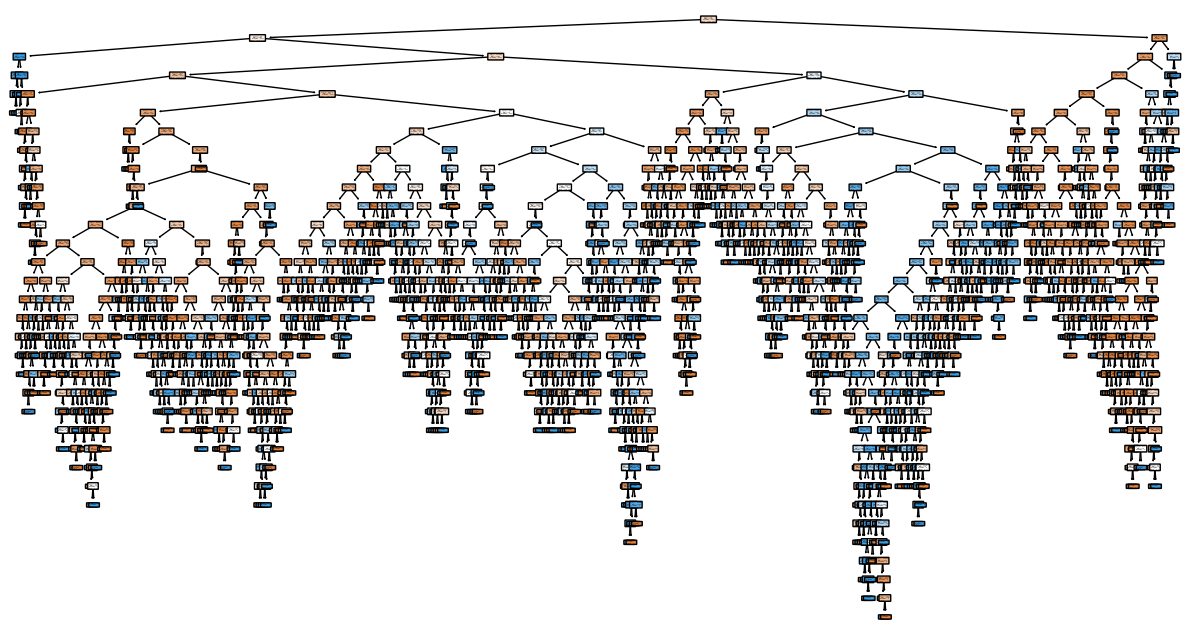

In [94]:
plt.figure(figsize=(15,8))
plot_tree(model_rf.estimators_[0],filled=True,rounded=True)
plt.show()


In [108]:
import pickle
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
plt.savefig("RE-tree.png")

<Figure size 640x480 with 0 Axes>

In [111]:
with open("model_rf.pkl","wb") as mf:
    pickle.dump(model_rf,mf)

In [112]:
with open("model_rf.pkl","rb") as mf:
    new_model = pickle.load(mf)

In [113]:
new_model

RandomForestClassifier(n_estimators=150, random_state=40)

In [114]:
test_data = np.array([[100, 92, 9000000, 612,36.0788,370,-81.1781,6574,987,674,93735,36373,33838,675,98,6,65,8,665 ]])
test_data

array([[ 1.00000e+02,  9.20000e+01,  9.00000e+06,  6.12000e+02,
         3.60788e+01,  3.70000e+02, -8.11781e+01,  6.57400e+03,
         9.87000e+02,  6.74000e+02,  9.37350e+04,  3.63730e+04,
         3.38380e+04,  6.75000e+02,  9.80000e+01,  6.00000e+00,
         6.50000e+01,  8.00000e+00,  6.65000e+02]])

In [115]:
predicted = new_model.predict(test_data)[0]
if predicted:
    print(predicted)
else:
    print("sorr something wrong")

sorr something wrong


C:\Users\SUBIN.S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [116]:
new_model.predict_proba(test_data)

C:\Users\SUBIN.S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.54, 0.46]])

# Desicion Tree Model

In [198]:
train_data,test_data,train_label,test_label = train_test_split(x,y, test_size=0.2,random_state=45)

In [199]:
model_1 = DecisionTreeClassifier(
    
    criterion='entropy',   ## Performance
    splitter='best',
    max_depth=10,  ## Performance
    min_samples_split=2,  ## Performance
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,  ## Performance
    random_state=45,  ## Performance
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

In [200]:
model_1

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=45)

In [201]:
model_1.fit(train_data,train_label)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=45)

In [202]:
list(x.columns)

['count_session',
 'time_latest_visit',
 'avg_visit_time',
 'days_since_last_visit',
 'days_since_first_visit',
 'visits_per_day',
 'bounce_rate',
 'earliest_source',
 'latest_source',
 'earliest_medium',
 'latest_medium',
 'earliest_keyword',
 'latest_keyword',
 'earliest_isTrueDirect',
 'latest_isTrueDirect',
 'num_interactions',
 'bounces',
 'time_on_site',
 'time_earliest_visit']

In [203]:
unique_classes = set(train_predict)  # Assuming train_pred contains the model predictions
class_names = ['0', '1']  # Adjust based on actual class names
if len(unique_classes) != len(class_names):
    print("Number of classes does not match.check class_name,")

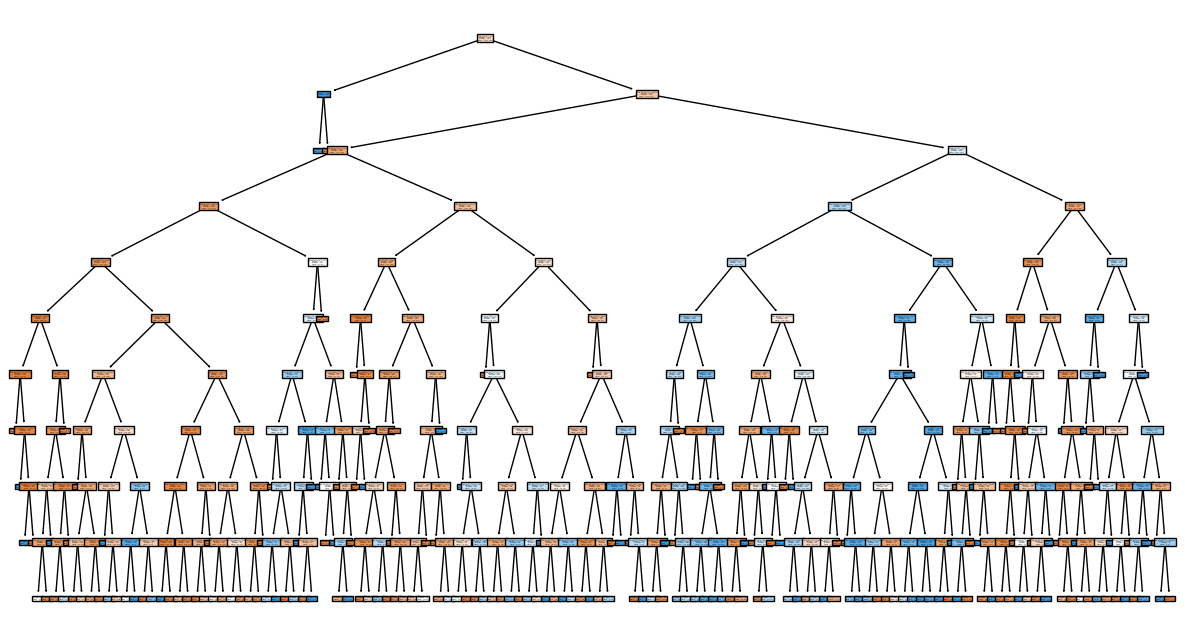

In [204]:
plt.figure(figsize=(15,8))
plot_tree(model_1,feature_names=list(x.columns),filled=True)
plt.show()

In [205]:
plt.savefig("d-tree.png")

<Figure size 640x480 with 0 Axes>

In [206]:
train_predict = model_1.predict(train_data)
test_predict = model_1.predict(test_data)

Train preformance Metrics:

In [207]:
accuracy = accuracy_score(train_label,train_predict)
precision = precision_score(train_label,train_predict)
recall = recall_score(train_label,train_predict)
f1 = f1_score(train_label,train_predict)

In [208]:
print("accuracy:",accuracy,"\nprecision :",precision,"\nrecall :",recall,"\nf1 :", f1)
confusion_matrix(train_label,train_predict)

accuracy: 0.8162932790224032 
precision : 0.776324395029431 
recall : 0.7801511666118962 
f1 : 0.7782330765448289


array([[3638,  684],
       [ 669, 2374]], dtype=int64)

Test Performance Metrics:

In [209]:
accuracy = accuracy_score(test_label,test_predict)
precision = precision_score(test_label,test_predict,average="micro")
f1 = f1_score(test_label,test_predict,average="micro")
recall = recall_score(test_label,test_predict,average="micro")

In [210]:
print("accuracy:",accuracy,"\nprecision :",precision,"\nrecall :",recall,"\nf1 :", f1)
confusion_matrix(test_label,test_predict)

accuracy: 0.7323561346362649 
precision : 0.7323561346362649 
recall : 0.7323561346362649 
f1 : 0.7323561346362649


array([[800, 252],
       [241, 549]], dtype=int64)

# KNN Model

In [211]:
train_data,test_data,train_label,test_label = train_test_split(x,y, test_size=0.2,random_state=42)

In [212]:
model_gb = GradientBoostingClassifier(learning_rate=0.12,n_estimators=150)

In [213]:
model_gb.fit(train_data,train_label)

GradientBoostingClassifier(learning_rate=0.12, n_estimators=150)

In [214]:
train_predict = model_gb.predict(train_data)
test_predict = model_gb.predict(test_data)

Train Performance Metrics

In [215]:
accuracy = accuracy_score(train_label,train_predict)
precision = precision_score(train_label,train_predict,average="micro")
recall = recall_score(train_label,train_predict,average="micro")
f1 = f1_score(train_label,train_predict,average="micro")

print("accuracy:",accuracy,"\nprecision :",precision,"\nrecall :",recall,"\nf1 :", f1)
confusion_matrix(train_label,train_predict)

accuracy: 0.8012219959266802 
precision : 0.8012219959266802 
recall : 0.8012219959266802 
f1 : 0.8012219959266802


array([[3787,  546],
       [ 918, 2114]], dtype=int64)

Test Performance Metrics

In [216]:
accuracy = accuracy_score(test_label,test_predict)
precision = precision_score(test_label,test_predict,average="micro")
f1 = f1_score(test_label,test_predict,average="micro")
recall = recall_score(test_label,test_predict,average="micro")

print("accuracy:",accuracy,"\nprecision :",precision,"\nrecall :",recall,"\nf1 :", f1)
confusion_matrix(test_label,test_predict)

accuracy: 0.7823018458197611 
precision : 0.7823018458197611 
recall : 0.7823018458197611 
f1 : 0.7823018458197611


array([[894, 147],
       [254, 547]], dtype=int64)

Classification Report

In [153]:
print(classification_report(train_label,train_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      4333
           1       0.79      0.70      0.74      3032

    accuracy                           0.80      7365
   macro avg       0.80      0.79      0.79      7365
weighted avg       0.80      0.80      0.80      7365



In [154]:
print(classification_report(test_label,test_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1041
           1       0.79      0.68      0.73       801

    accuracy                           0.78      1842
   macro avg       0.78      0.77      0.77      1842
weighted avg       0.78      0.78      0.78      1842



In [155]:
test_label.value_counts()

has_converted
0    1041
1     801
Name: count, dtype: int64

save the model

In [157]:
with open ("model_gb.pkl","wb") as mf:
    pickle.dump(model_gb,mf)

#  PIE Chart Featured Category

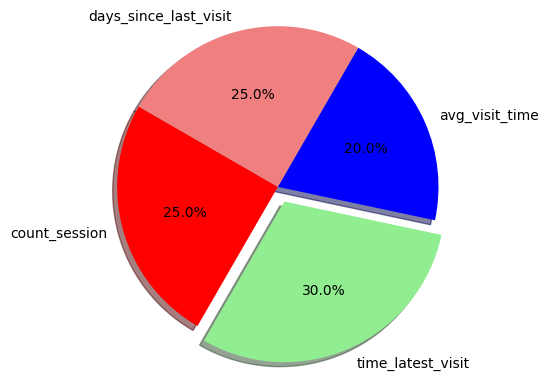

In [156]:
data_6 = ["count_session","time_latest_visit","avg_visit_time","days_since_last_visit","days_since_first_visit","visits_per_day","bounce_rate","earliest_source","latest_source","earliest_medium","latest_medium","earliest_keyword","latest_keyword","earliest_isTrueDirect","latest_isTrueDirect","num_interactions","bounces","time_on_site","has_converted","time_earliest_visit"]
sizes = [25,30,20,25] # precentage sum upto 100

# Color for each category
colors = ['red','lightgreen',"blue","lightcoral"]

# Exploding the 2th slice (category B)
explode = (0,0.1,0,0)

fig = plt.subplots()
# plotting the pie chart
plt.pie(sizes,explode=explode,labels=data_6[:len(sizes)], colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

# Aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')
plt.show()
